In [123]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/storage/scratch/groshchupkin/Tom_dataset/dataset.csv')

# Print the DataFrame to check its contents
print(df.shape)
data = df.iloc[:, 3:]
# print(data.columns.tolist())

(1067, 994)
['35', '50', '55', '62', '93', '98', '111', '112', '117', '132', '144', '158', '179', '180', '181', '182', '189', '192', '194', '197', '207', '209', '212', '213', '229', '231', '234', '235', '240', '241', '244', '250', '252', '254', '266', '267', '272', '273', '275', '278', '297', '302', '310', '313', '330', '331', '338', '339', '340', '342', '344', '355', '356', '358', '363', '376', '381', '391', '397', '407', '409', '415', '424', '432', '439', '444', '445', '452', '460', '466', '477', '480', '482', '498', '501', '503', '504', '512', '519', '533', '535', '536', '537', '561', '563', '564', '565', '566', '572', '796', '799', '800', '803', '806', '811', '815', '821', '823', '825', '827', '849', '872', '881', '888', '891', '892', '893', '917', '922', '923', '926', '932', '980', '1001', '1002', '1004', '1021', '1022', '1023', '1024', '1025', '1026', '1052', '1053', '1082', '1083', '1084', '1087', '1090', '1094', '1102', '1104', '1105', '1110', '1111', '1113', '1114', '1124', '1

In [2]:
# Check for missing values
missing_indices = {col: df.index[df[col].isnull()].tolist() for col in df.columns if df[col].isnull().any()}
print(missing_indices)

{}


In [3]:
# df.drop(df.index[643], inplace=True)
# df.shape
# df.to_csv('/storage/scratch/groshchupkin/Tom_dataset/dataset.csv', index=False)

In [124]:
# Check for duplicates
# duplicate_rows = df[df.duplicated()]
# print(duplicate_rows)

In [5]:
# Check data types
df.dtypes

ergoid                int64
depression_score    float64
depression_label    float64
35                  float64
50                  float64
                     ...   
999926107           float64
999926108           float64
999926109           float64
999926111           float64
999926119           float64
Length: 994, dtype: object

In [1]:
# df.info()

In [125]:
# Checking for outliers: Interquartile Range (IQR) Method
# Calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Function to count outliers based on IQR
def count_outliers_iqr(column):
    return ((column < (Q1[column.name] - 1.5 * IQR[column.name])) | 
            (column > (Q3[column.name] + 1.5 * IQR[column.name]))).sum()

# Apply the function across columns
outlier_counts_iqr = df.apply(count_outliers_iqr)

# Sort columns by the number of outliers
outlier_ranking_iqr = outlier_counts_iqr.sort_values(ascending=False)

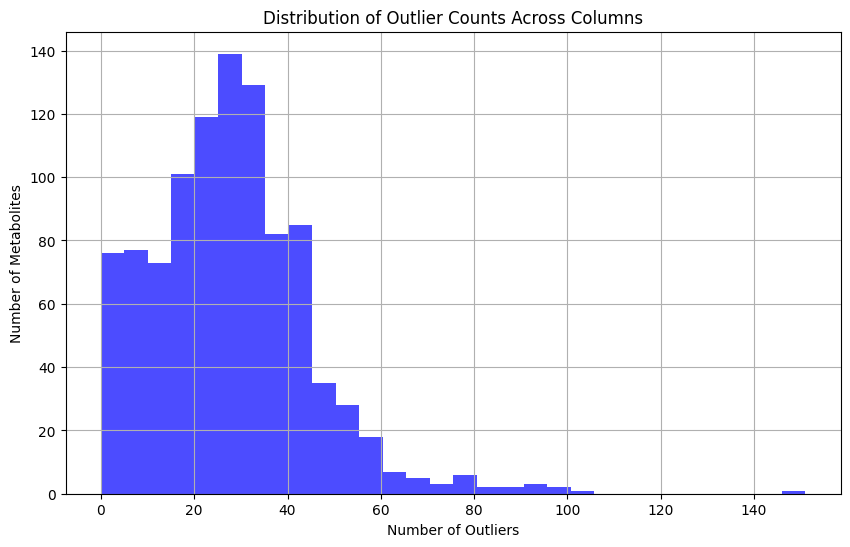

In [8]:
# Plotting the distribution of outlier counts
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(outlier_counts_iqr, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Outlier Counts Across Columns')
plt.xlabel('Number of Outliers')
plt.ylabel('Number of Metabolites')
plt.grid(True)
plt.show()

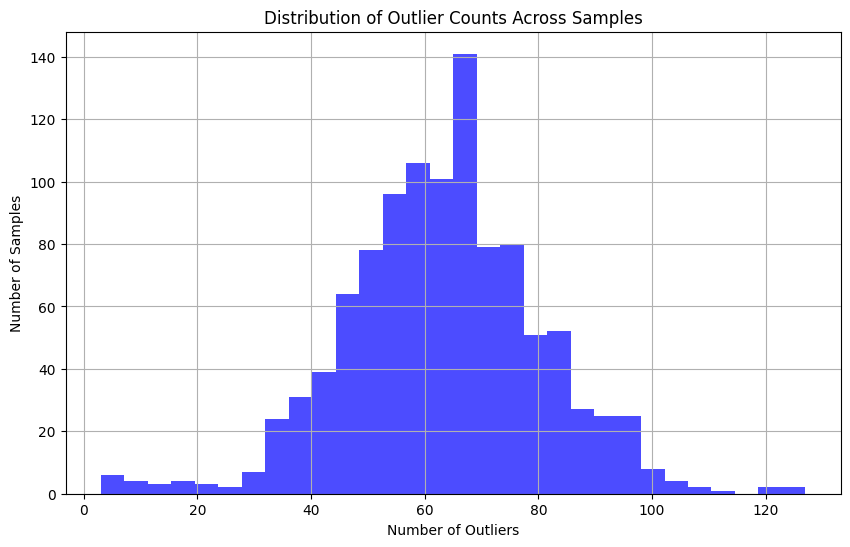

In [9]:
## Outliars across rows
# Transpose the DataFrame to treat rows as columns
df_transposed = df.T

# Calculate Q1, Q3, and IQR for each 'column' in the transposed DataFrame
Q1 = df_transposed.quantile(0.25)
Q3 = df_transposed.quantile(0.75)
IQR = Q3 - Q1

# Apply function across 'columns'
outlier_counts_iqr = df_transposed.apply(count_outliers_iqr)

# Plotting the distribution of outlier counts across what were originally rows
plt.figure(figsize=(10, 6))
plt.hist(outlier_counts_iqr, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Outlier Counts Across Samples')
plt.xlabel('Number of Outliers')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

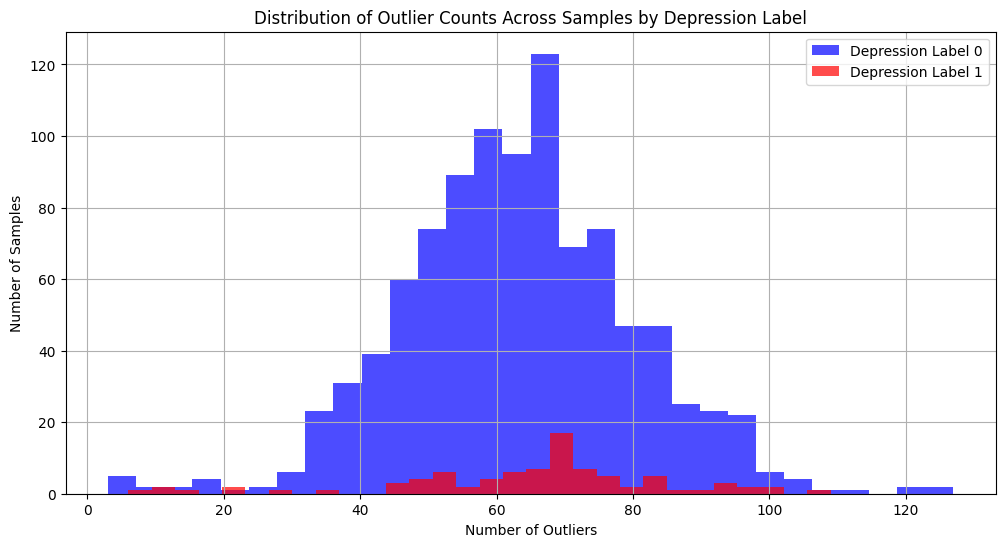

In [10]:
# Distribution based on class label
# Splitting the DataFrame into two groups based on 'depression_label'
group_1 = df[df['depression_label'] == 1]
group_0 = df[df['depression_label'] == 0]

# Function to calculate row outliers using the IQR method
def calculate_row_outliers(data):
    # Transpose the DataFrame to treat rows as columns
    data_transposed = data.T
    
    # Calculate Q1, Q3, and IQR for each 'column' in the transposed DataFrame
    Q1 = data_transposed.quantile(0.25)
    Q3 = data_transposed.quantile(0.75)
    IQR = Q3 - Q1
    
    # Count outliers per 'column' (originally rows)
    outlier_count = data_transposed.apply(count_outliers_iqr)
    return outlier_count

# Calculate outliers for each group
outliers_1 = calculate_row_outliers(group_1)
outliers_0 = calculate_row_outliers(group_0)

# Plotting the distribution of outlier counts for both groups in one histogram
plt.figure(figsize=(12, 6))
plt.hist(outliers_0, bins=30, alpha=0.7, label='Depression Label 0', color='blue')
plt.hist(outliers_1, bins=30, alpha=0.7, label='Depression Label 1', color='red')
plt.title('Distribution of Outlier Counts Across Samples by Depression Label')
plt.xlabel('Number of Outliers')
plt.ylabel('Number of Samples')
plt.legend()
plt.grid(True)
plt.show()

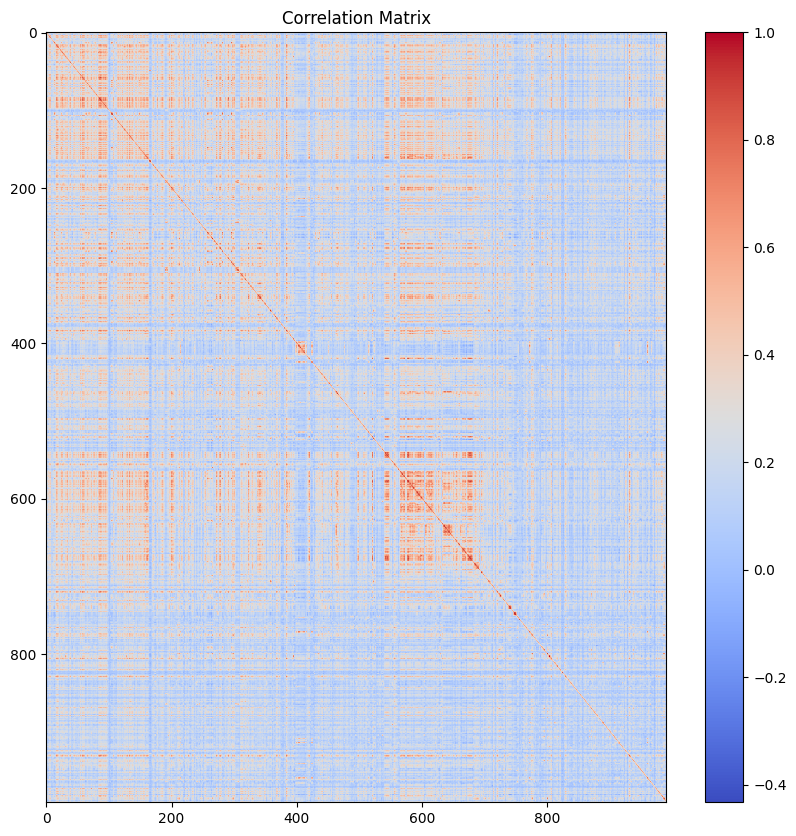

In [111]:
# Compute the correlation matrix
correlation_matrix = df.iloc[:, 3:].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

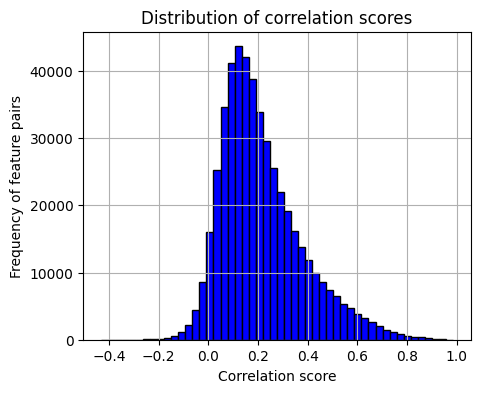

In [119]:
upper_tri = correlation_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convert the upper triangle matrix to a 1D array
correlation_values = upper_tri.unstack().dropna()

# Plot histogram of correlation values
plt.figure(figsize=(5, 4))
plt.hist(correlation_values, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of correlation scores')
plt.xlabel('Correlation score')
plt.ylabel('Frequency of feature pairs')
plt.grid(True)
plt.show()

In [112]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flatten the upper triangle matrix to a 1D array and remove the NaN values
upper_triangle_flat = upper_triangle.unstack().dropna()

# Calculate the average correlation
average_correlation = upper_triangle_flat.mean()

average_correlation

0.2148545950597517

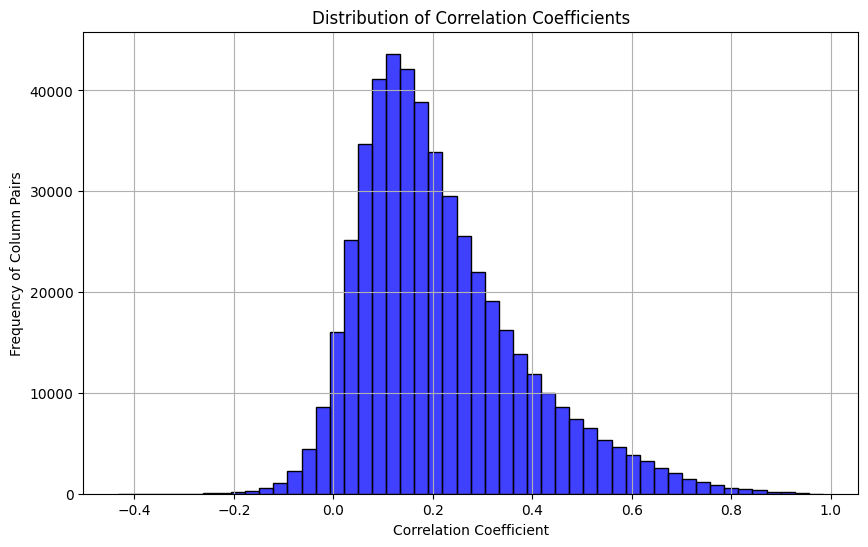

In [11]:
# Correlation checks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.iloc[:, 3:].corr()

# Get the upper triangle of the correlation matrix, excluding the diagonal
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten the upper triangle to get a series of correlation coefficients
corr_values = upper_tri.stack()

# Plotting the histogram of correlation values
plt.figure(figsize=(10, 6))
sns.histplot(corr_values, bins=50, kde=False, color='blue')
plt.title('Distribution of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency of Column Pairs')
plt.grid(True)
plt.show()

In [ ]:
# annotations = pd.read_csv('/storage/scratch/groshchupkin/Tom_dataset/Metabolon_ListOfMetabolites.txt', sep="\t")

In [13]:
# Step 1: Get the column names from df
column_names = df.iloc[:, 3:].columns

# Step 2: Prepend 'm' to each column name to match with CHEM_ID in annotations
chem_ids = ['m' + name for name in column_names]

# Step 3: Initialize a new dataframe with specified columns
metabolite_annotations = pd.DataFrame(columns=['ID', 'SUPER_PATHWAY', 'SUB_PATHWAY'])

# Iterate over each column name and corresponding CHEM_ID
for col, chem_id in zip(column_names, chem_ids):
    # Extract the row from annotations that matches the CHEM_ID
    annotation_data = annotations[annotations['CHEM_ID'] == chem_id].loc[:, ["SUPER_PATHWAY", "SUB_PATHWAY"]]

    if annotation_data.empty:
        print("Empty")

    annotation_data.fillna('UNNAMED', inplace=True)
    
    # Since annotation_data could have multiple rows, iterate through each row
    multiple_rows = False
    for _, row in annotation_data.iterrows():
        # Create a temporary DataFrame for each row to be added
        temp_df = pd.DataFrame({
            'ID': [col], 
            'SUPER_PATHWAY': [row['SUPER_PATHWAY']], 
            'SUB_PATHWAY': [row['SUB_PATHWAY']]
        })
        # Concatenate the temporary DataFrame to the main new_data DataFrame
        metabolite_annotations = pd.concat([metabolite_annotations, temp_df], ignore_index=True)
        if multiple_rows:
            print("Multiple rows")
        multiple_rows = True

# Display the new dataframe
print(metabolite_annotations.head())

   ID           SUPER_PATHWAY                             SUB_PATHWAY
0  35              Amino Acid                    Glutamate Metabolism
1  50              Amino Acid                    Polyamine Metabolism
2  55  Cofactors and Vitamins  Nicotinate and Nicotinamide Metabolism
3  62                   Lipid                   Fatty Acid, Dihydroxy
4  93                  Energy                               TCA Cycle


In [14]:
metabolite_annotations.to_csv("/storage/scratch/groshchupkin/Tom_dataset/annotations.csv", index=False)

In [15]:
annot = pd.read_csv("/storage/scratch/groshchupkin/Tom_dataset/annotations.csv")
print(annot.tail())

            ID SUPER_PATHWAY SUB_PATHWAY
986  999926107       UNNAMED     UNNAMED
987  999926108       UNNAMED     UNNAMED
988  999926109       UNNAMED     UNNAMED
989  999926111       UNNAMED     UNNAMED
990  999926119       UNNAMED     UNNAMED


In [16]:
super_pathway_counts = annot['SUPER_PATHWAY'].value_counts()
print(super_pathway_counts)

SUPER_PATHWAY
Lipid                                390
Amino Acid                           197
UNNAMED                              183
Xenobiotics                           99
Nucleotide                            32
Cofactors and Vitamins                27
Peptide                               24
Carbohydrate                          17
Partially Characterized Molecules     14
Energy                                 8
Name: count, dtype: int64


In [17]:
annot.groupby('SUPER_PATHWAY')['SUB_PATHWAY'].nunique()

SUPER_PATHWAY
Amino Acid                           15
Carbohydrate                          4
Cofactors and Vitamins                7
Energy                                1
Lipid                                53
Nucleotide                            7
Partially Characterized Molecules     1
Peptide                               4
UNNAMED                               1
Xenobiotics                           7
Name: SUB_PATHWAY, dtype: int64

In [18]:
grouped = annot.groupby('SUPER_PATHWAY')['SUB_PATHWAY'].agg([
    ('SUB_PATHWAY Count', 'nunique'), # Count of unique SUB_PATHWAYs
    ('SUB_PATHWAY Occurrences', lambda x: x.value_counts().values.tolist()) # Only counts of each SUB_PATHWAY occurrence
])
grouped

,SUB_PATHWAY Count,SUB_PATHWAY Occurrences
SUPER_PATHWAY,,
Amino Acid,15,"[34, 22, 21, 18, 17, 15, 15, 12, 10, 8, 8, 7, ..."
Carbohydrate,4,"[6, 5, 4, 2]"
Cofactors and Vitamins,7,"[6, 6, 5, 4, 3, 2, 1]"
Energy,1,[8]
Lipid,53,"[29, 24, 24, 22, 21, 19, 19, 17, 14, 11, 11, 1..."
Nucleotide,7,"[10, 5, 5, 4, 3, 3, 2]"
Partially Characterized Molecules,1,[14]
Peptide,4,"[15, 5, 3, 1]"
UNNAMED,1,[183]


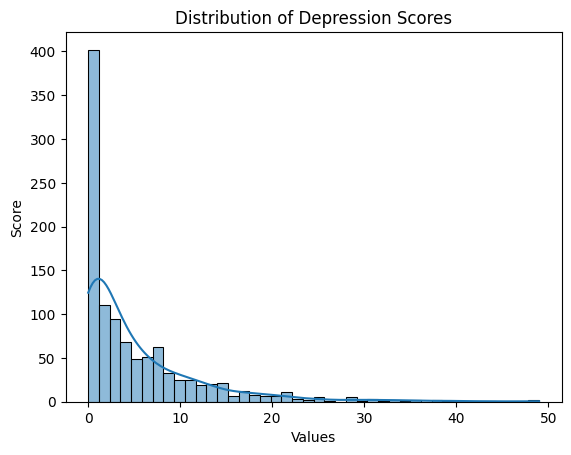

In [32]:
sns.histplot(df['depression_score'], kde=True)

# Set titles and labels (optional)
plt.title('Distribution of Depression Scores')
plt.xlabel('Values')
plt.ylabel('Score')

# Show plot
plt.show()

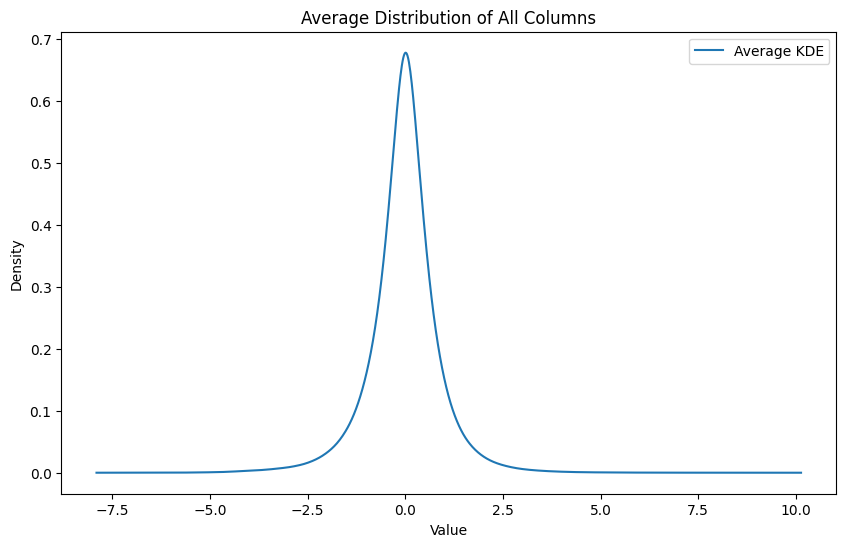

In [20]:
from scipy.stats import gaussian_kde

# Define a range for evaluation of KDEs (customize this based on your data range)
data = df.iloc[:, 3:]

x = np.linspace(data.min().min(), data.max().max(), 1000)

# Compute KDE for each column and collect them
kdes = []
for column in data.columns:
    kde = gaussian_kde(data[column])
    kdes.append(kde(x))

# Average the KDEs
avg_kde = np.mean(kdes, axis=0)

# Plot the average KDE
plt.figure(figsize=(10, 6))
plt.plot(x, avg_kde, label='Average KDE')
plt.title('Average Distribution of All Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
10


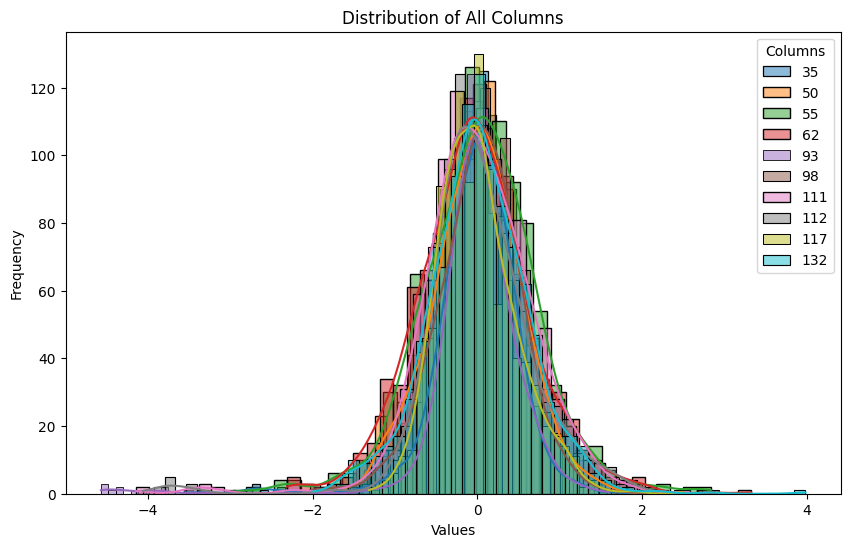

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
count = 1
for column in data.columns:
    sns.histplot(data[column], kde=True, label=str(column))
    print(count)
    count += 1
    if count > 3:
        break
    
plt.title('Distribution of All Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(title='Columns')
plt.show()

In [3]:
# df

In [88]:
# Dimentionality reduction
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = df.iloc[:, 3:].values
labels = df.iloc[:, 2].values

Summary Statistics:
   Label Dimension 1            Dimension 2          
               mean        std        mean       std
0   0.0   -0.446557  10.517258   -0.546962  8.954919
1   1.0    0.824402  12.033705   -1.524145  9.859606

Mann-Whitney U Test Results:
Dimension 1: U Statistic = 39506.0, p-value = 0.3286872604535055
Dimension 2: U Statistic = 44804.0, p-value = 0.338908149628823


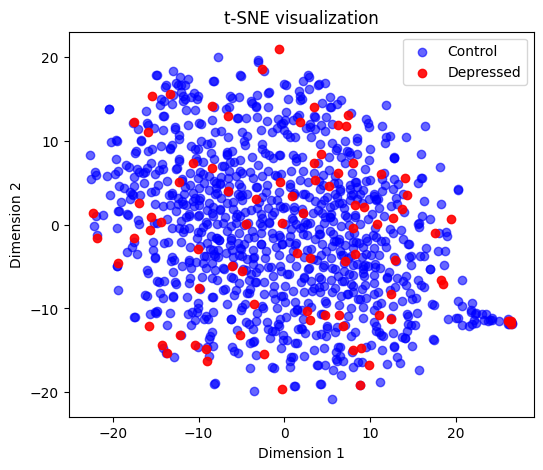

In [108]:
############### t-SNE final ################## 

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming `df` is the provided DataFrame
# Extract features and labels
features = df.iloc[:, 3:].values
labels = df.iloc[:, 2].values

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame with t-SNE results and labels
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Label'] = labels

# Calculate mean and standard deviation for each group in each dimension
summary_stats = tsne_df.groupby('Label').agg(['mean', 'std']).reset_index()
# Perform Mann-Whitney U test for each dimension between the two groups
control_group = tsne_df[tsne_df['Label'] == 0]
depression_group = tsne_df[tsne_df['Label'] == 1]

u_stat_dim1, p_value_dim1 = mannwhitneyu(control_group['Dimension 1'], depression_group['Dimension 1'])
u_stat_dim2, p_value_dim2 = mannwhitneyu(control_group['Dimension 2'], depression_group['Dimension 2'])

# Print results
print("Summary Statistics:\n", summary_stats)
print("\nMann-Whitney U Test Results:")
print(f"Dimension 1: U Statistic = {u_stat_dim1}, p-value = {p_value_dim1}")
print(f"Dimension 2: U Statistic = {u_stat_dim2}, p-value = {p_value_dim2}")

palette = {'Healthy': 'blue', 'Depression': 'red'}

# Plotting the t-SNE results
plt.figure(figsize=(6, 5))
plt.scatter(tsne_df[tsne_df['Label'] == 0]['Dimension 1'], tsne_df[tsne_df['Label'] == 0]['Dimension 2'], label='Control', alpha=0.6, color="blue")
plt.scatter(tsne_df[tsne_df['Label'] == 1]['Dimension 1'], tsne_df[tsne_df['Label'] == 1]['Dimension 2'], label='Depressed', alpha=0.9, color="red")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE visualization')
plt.legend()
plt.savefig("tsne_final_2.png")
plt.show()

/home/tkitak/.local/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


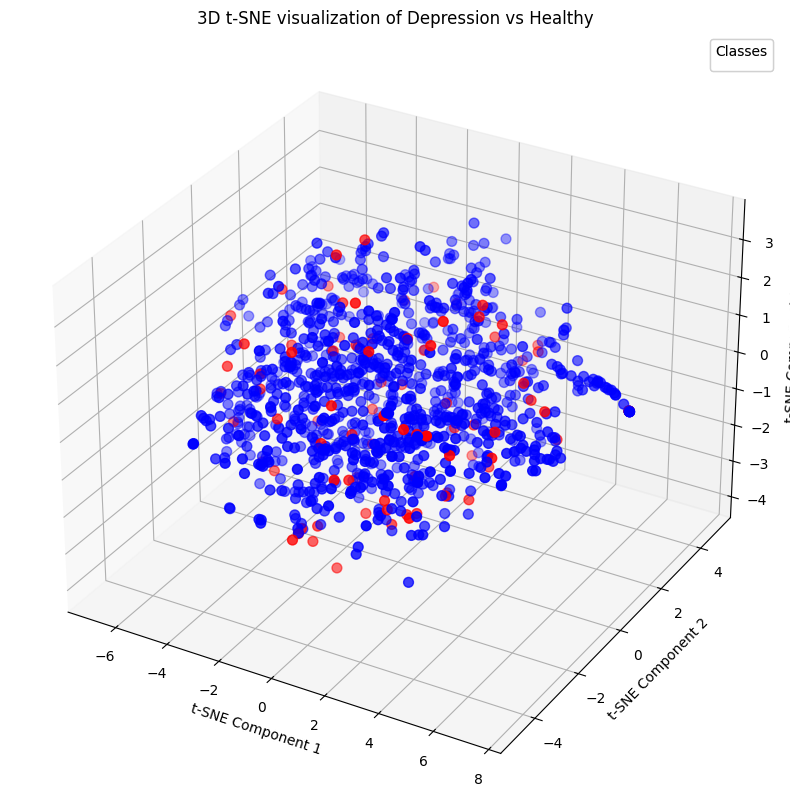

In [86]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=50)
pca_result = pca.fit_transform(features)

tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

plot_data = pd.DataFrame({
    'x': tsne_result[:, 0],
    'y': tsne_result[:, 1],
    'z': tsne_result[:, 2],
    'label': labels
})

label_mapping = {0: 'Healthy', 1: 'Depression'}
plot_data['label_name'] = plot_data['label'].map(label_mapping)

palette = {'Healthy': 'blue', 'Depression': 'red'}
colors = plot_data['label_name'].map(palette)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(plot_data['x'], plot_data['y'], plot_data['z'], c=colors, s=50)

legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE visualization of Depression vs Healthy')

plt.show()